In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import json
plt.style.use('ggplot')

In [2]:
with open('data/countries.json', 'r') as f:
    countries = json.load(f)
countries_map = dict([(countries[i], i) for i in range(len(countries))])
    
with open('data/continents.json', 'r') as f:
    continents = json.load(f)
continents = dict([(x['country'], x['continent']) for x in continents])
    
with open('data/initial_network.np', 'rb') as f:
    initial_network = np.load(f)

with open('data/temporal_network.np', 'rb') as f:
    temporal_network = np.load(f)

## perguntas a serem respondidas:

- Quais países recebem maior quantidade de voos de lugares diferentes? (resposta esperada: EUA, Europa)
- Quais países voam para maior quantidade de lugares diferentes? (resposta esperada: mesmo que os anteriores)
- A rede inicial é uma rede aleatória? (resposta esperada: não)
- A rede inicial é livre de escala? Qual o parâmetro? (resposta esperada: sim)
- A rede inicial é uma rede neutra?
- A rede inicial possui quantas componentes conexas? Esse número se mantém ao longo do tempo?
- A rede inicial pode ser separada em grupos/comunidades?
- Qual é a relação entre esses grupos com o passar do tempo?
- Para cada país, a série temporal de número de países que ele pode viajar possui correlação com o número de casos? (resposta esperada: quando um país possui mais casos, ele passe a poder viajar para menos países)
- Quando um país vai remover uma rota de viagem, ele faz de forma aleatória? (resposta esperada: não, ele faz com maior probabilidade para países com maior casos/crescimento de casos)
- É possível identificar o impacto das variantes da África do sul e da Inglaterra na rede?

# Analysis of initial network

In [4]:
print(f"Network out-degree mean: {initial_network.sum(axis = 0).mean()}")
print("Obs.: out-degree is the number of travels out of the country")
print(f"Network in-degree mean: {initial_network.sum(axis = 1).mean()}")
print("Obs.: in-degree is the number of travels to the country")

Network out-degree mean: 20.25777777777778
Obs.: out-degree is the number of travels out of the country
Network in-degree mean: 20.25777777777778
Obs.: in-degree is the number of travels to the country


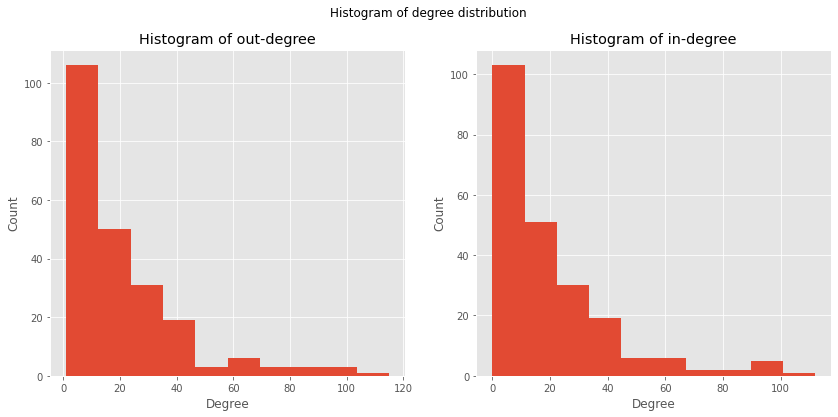

In [5]:
countries_degree_out = list(zip(countries, initial_network.sum(axis = 0)))
countries_degree_in = list(zip(countries, initial_network.sum(axis = 1)))
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
ax[0].hist([x[1] for x in countries_degree_out])
ax[0].set_title("Histogram of out-degree")
ax[1].hist([x[1] for x in countries_degree_in])
ax[1].set_title("Histogram of in-degree")

for i in range(2):
    ax[i].set_xlabel("Degree")
    ax[i].set_ylabel("Count")

plt.suptitle("Histogram of degree distribution")
plt.show()

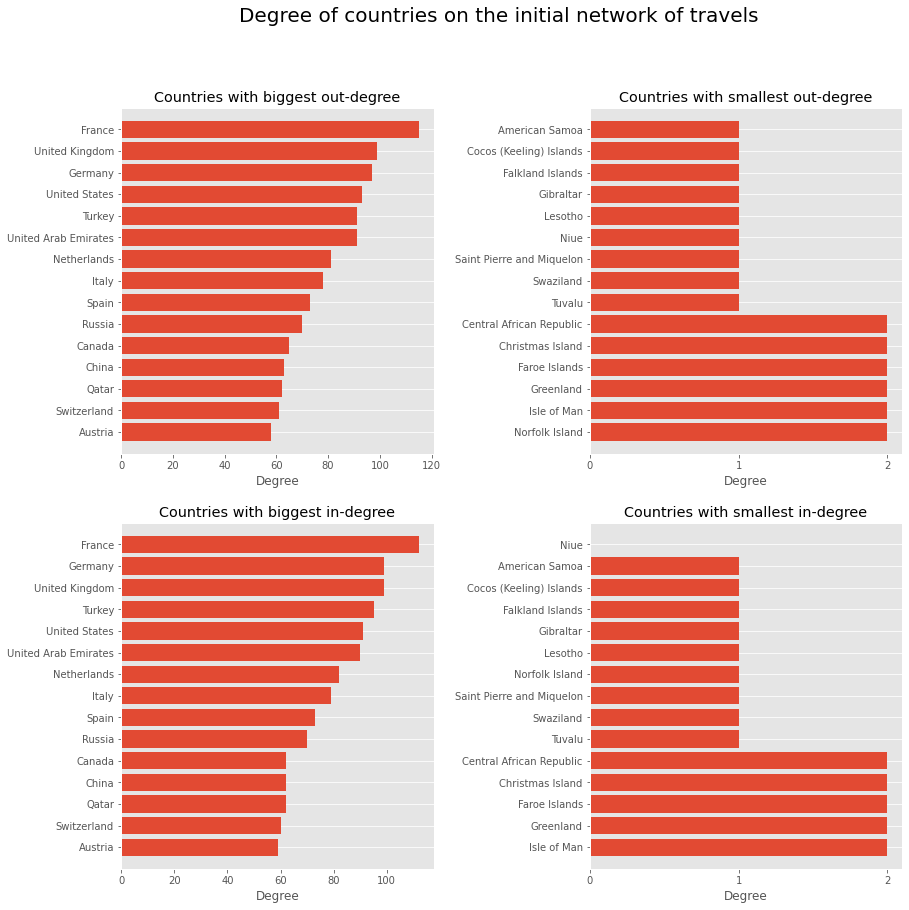

In [6]:
n = 15
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (14,14))
plt.subplots_adjust(wspace = 0.5)
for i in range(2):
    for j in range(2):
        ax[i, j].grid(axis = 'x')
        ax[i, j].set_xlabel("Degree")
        ax[i, j].set_ylim((15, -1)) 
        ax[i, j].set_yticks(list(range(n)))
        
countries_degree_out.sort(key = lambda x : x[1], reverse = True)

ax[0, 0].set_title("Countries with biggest out-degree")
ax[0, 0].barh(list(range(n)), [countries_degree_out[i][1] for i in range(n)])
ax[0, 0].set_yticklabels([countries_degree_out[i][0] for i in range(n)])

countries_degree_out.sort(key = lambda x : x[1])

ax[0, 1].set_title("Countries with smallest out-degree")
ax[0, 1].barh(list(range(n)), [countries_degree_out[i][1] for i in range(n)])
ax[0, 1].set_xticks([0, 1, 2])
ax[0, 1].set_yticklabels([countries_degree_out[i][0] for i in range(n)])


countries_degree_in.sort(key = lambda x : x[1], reverse = True)

ax[1, 0].set_title("Countries with biggest in-degree")
ax[1, 0].barh(list(range(n)), [countries_degree_in[i][1] for i in range(n)])
ax[1, 0].set_yticklabels([countries_degree_in[i][0] for i in range(n)])

countries_degree_in.sort(key = lambda x : x[1])

ax[1, 1].set_title("Countries with smallest in-degree")
ax[1, 1].barh(list(range(n)), [countries_degree_in[i][1] for i in range(n)])
ax[1, 1].set_xticks([0, 1, 2])
ax[1, 1].set_yticklabels([countries_degree_in[i][0] for i in range(n)])

plt.suptitle("Degree of countries on the initial network of travels", size = 20)
plt.show()

# Analysis of network evolution

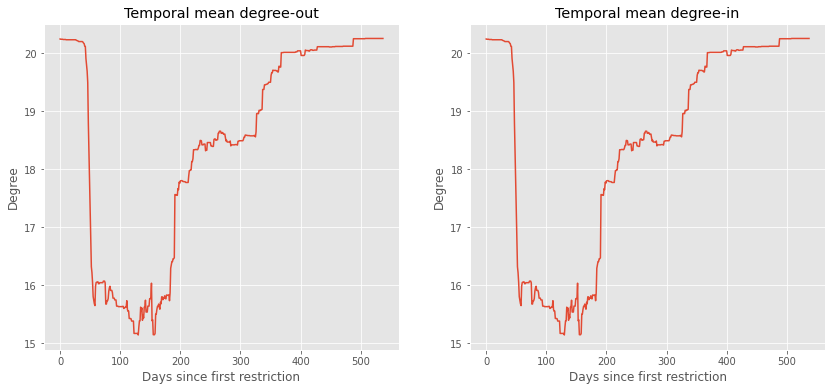

In [7]:
countries_temporal_degree_out_mean = temporal_network.sum(axis = 1).mean(axis = 1)
countries_temporal_degree_in_mean = temporal_network.sum(axis = 2).mean(axis = 1)
n_days = temporal_network.shape[0]
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (14, 6))
ax[0].plot(list(range(n_days)), countries_temporal_degree_out_mean)
ax[0].set_title("Temporal mean degree-out")
ax[1].plot(list(range(n_days)), countries_temporal_degree_in_mean)
ax[1].set_title("Temporal mean degree-in")

for i in range(2):
    ax[i].set_xlabel("Days since first restriction")
    ax[i].set_ylabel("Degree")
plt.show()

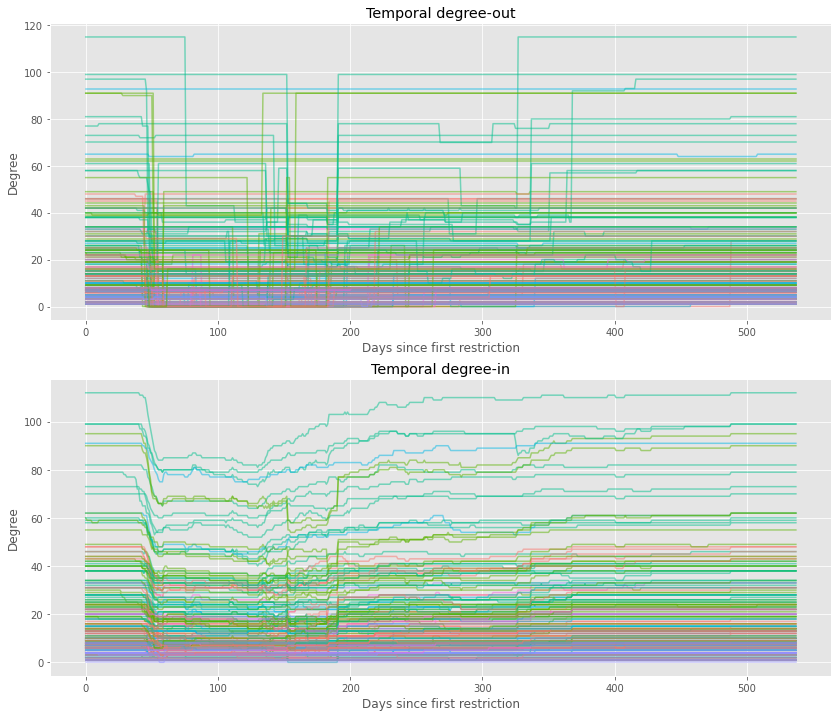

In [8]:
countries_temporal_degree_out = list(zip(countries, temporal_network.sum(axis = 1).transpose()))
countries_temporal_degree_in = list(zip(countries, temporal_network.sum(axis = 2).transpose()))

colors = {'Africa': "#F8766D", "Antartica": "#C59900",
         "Asia": "#5bb300", "Europe": "#00c08d", 
         "North America": "#00b8e5", "Oceania": "#9590ff",
         "South America": "#f763e0"}

fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 12))
for i in range(len(countries)):
    country = countries_temporal_degree_out[i][0]
    color = colors[continents[country]]
    ax[0].plot(list(range(n_days)), countries_temporal_degree_out[i][1], c = color, alpha = 0.5)
    country = countries_temporal_degree_in[i][0]
    color = colors[continents[country]]
    ax[1].plot(list(range(n_days)), countries_temporal_degree_in[i][1], c = color, alpha = 0.5)
ax[0].set_title("Temporal degree-out")
ax[1].set_title("Temporal degree-in")



for i in range(2):
    ax[i].set_xlabel("Days since first restriction")
    ax[i].set_ylabel("Degree")
plt.show()

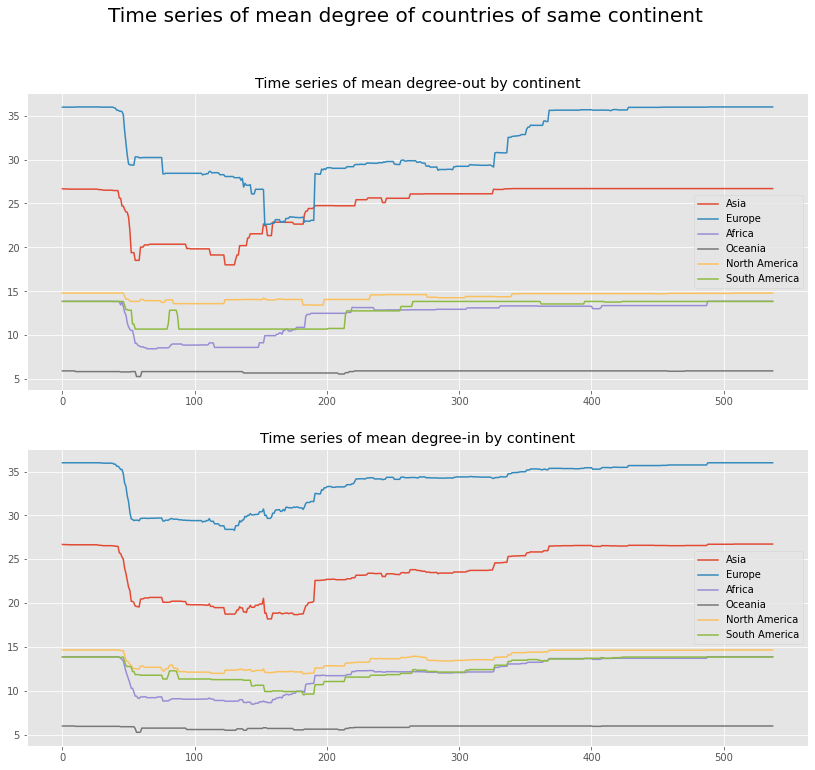

In [9]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 12))

continents_temporal_degrees_out = dict([(v, []) for v in continents.values()])
for country in countries:
    country_i = countries_map[country]
    cont = continents[country]
    continents_temporal_degrees_out[cont].append(temporal_network[:, :, country_i].sum(axis = 1))
for cont in continents_temporal_degrees_out.keys():
    if len(continents_temporal_degrees_out[cont]) > 0:
        continents_temporal_degrees_out[cont] = np.mean(continents_temporal_degrees_out[cont], axis = 0)
        ax[0].plot(list(range(n_days)), continents_temporal_degrees_out[cont], label = cont)
ax[0].legend()


ax[0].set_title("Time series of mean degree-out by continent")

continents_temporal_degrees_in = dict([(v, []) for v in continents.values()])
for country in countries:
    country_i = countries_map[country]
    cont = continents[country]
    continents_temporal_degrees_in[cont].append(temporal_network[:, country_i, :].sum(axis = 1))
for cont in continents_temporal_degrees_in.keys():
    if len(continents_temporal_degrees_in[cont]) > 0:
        continents_temporal_degrees_in[cont] = np.mean(continents_temporal_degrees_in[cont], axis = 0)
        ax[1].plot(list(range(n_days)), continents_temporal_degrees_in[cont], label = cont)
ax[1].legend()
ax[1].set_title("Time series of mean degree-in by continent")

plt.suptitle("Time series of mean degree of countries of same continent", size = 20)
plt.show()

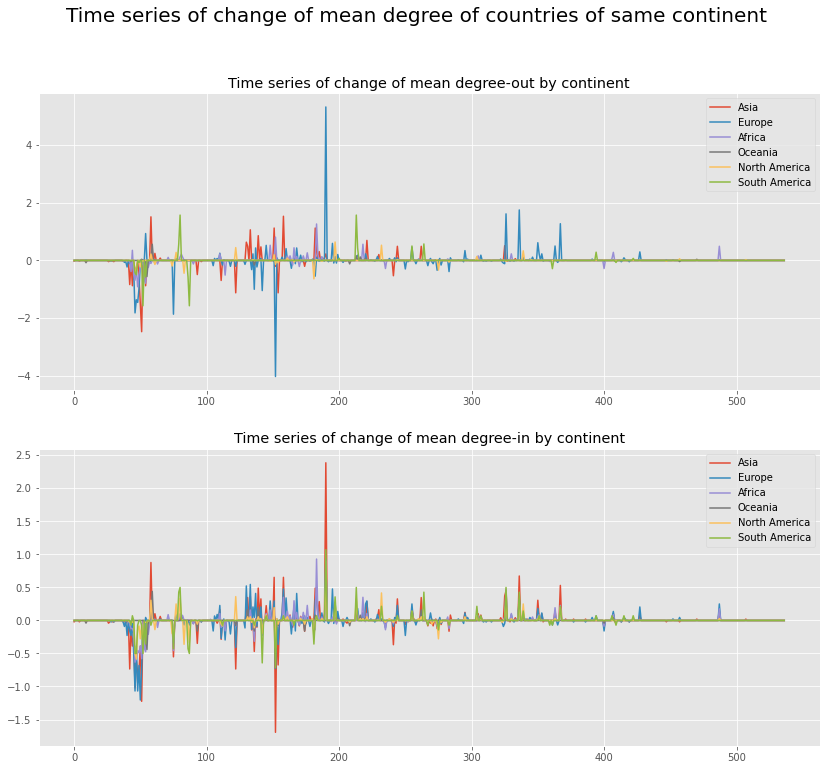

In [10]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (14, 12))

for cont in continents_temporal_degrees_out.keys():
    if len(continents_temporal_degrees_out[cont]) > 0:
        ax[0].plot(list(range(n_days - 1)), np.diff(continents_temporal_degrees_out[cont]), label = cont)
ax[0].legend()
ax[0].set_title("Time series of change of mean degree-out by continent")

for cont in continents_temporal_degrees_in.keys():
    if len(continents_temporal_degrees_in[cont]) > 0:
        ax[1].plot(list(range(n_days- 1)), np.diff(continents_temporal_degrees_in[cont]), label = cont)
ax[1].legend()
ax[1].set_title("Time series of change of mean degree-in by continent")

plt.suptitle("Time series of change of mean degree of countries of same continent", size = 20)
plt.show()

## Scale free network

In [39]:
#this cell will probably take time
G = [nx.from_numpy_matrix(temporal_network[i, :, :], create_using = nx.DiGraph) for i in range(n_days)]

In [40]:
max_degree = [temporal_network[i, :, :].sum(axis = 0).max() for i in range(n_days)]

In [41]:
import powerlaw

In [42]:
fit = [powerlaw.Fit(temporal_network[i, :, :].sum(axis = 1), discrete=True) for i in range(n_days)]

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than

Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
Values less than

In [43]:
N = len(countries)
kmax = [f.xmin*(N**(1/(f.alpha-1))) for f in fit]

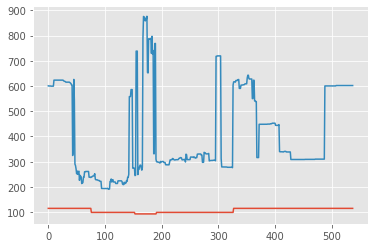

In [44]:
plt.plot(list(range(n_days)), max_degree)
plt.plot(list(range(n_days)), kmax)

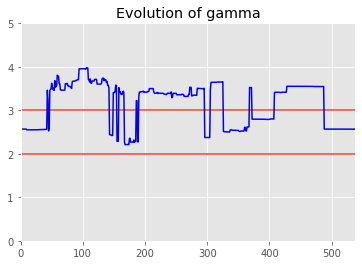

In [45]:
plt.title("Evolution of gamma")
plt.plot(list(range(n_days)), [f.alpha for f in fit], c = "blue")
plt.hlines(2, 0, n_days)
plt.hlines(3, 0, n_days)
plt.ylim((0, 5))
plt.xlim((0, n_days))
plt.show()

In [38]:
components = [nx.number_connected_components(g) for g in G]

NetworkXNotImplemented: not implemented for directed type